# Building a CNN

In [1]:
from pathlib import Path
import pandas as pd
# import numpy as np
import torch
from torch.utils.data import DataLoader
from plotnine import *
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.dataset import CnvDataset, CnvMemoryDataset

In [4]:
# global variables
# MODEL_NAME = 'eval'
# BATCH = '1'
EPOCHS = 20
INCLUDE_DNA = False
INCLUDE_ATAC = True
INCLUDE_CNV = True
SEQ_LEN = 10_000
IN_DIM = len(CnvDataset._subset_embedding_rows(
    dna=INCLUDE_DNA, atac=INCLUDE_ATAC, cnv=INCLUDE_CNV
    ))
OUT_DIM = 1
print('CNN training script running for batch {}'.format(BATCH))
assert BATCH in ('1', '2'), 'Batch number not known: {}'.format(BATCH)

CNN training script running for batch 2


In [5]:
# paths
git_root = Path('.')
data_root = git_root / 'data'
assert data_root.exists(), \
    'Data directory not found!\n{} does not exist'.format(data_root.absolute())
model_path = git_root / 'model'
assert model_path.is_dir(), 'Directory for saving models does not exist'
plot_path = git_root / 'out' / 'plots' / 'cnn_training'
if not plot_path.exists():
    plot_path.mkdir(parents=True)
tb_log_path = Path('log') / 'tensorboard'
assert tb_log_path.is_dir(), 'Tensorboard logging directory does not exist!'

In [6]:
# hyper parameters
hparams = {
    'batch_size': 32,
    'epochs': EPOCHS,
    'lr': 1e-4,
    'in_dim': IN_DIM
}
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [7]:
from src.network.chromosome_cnn import ChromosomeCNN, ModifiedChromosomeCNN
from src.network.simple_nn import SimpleCNN, DeepCNN
from src.network.promoter_nn import PromoterCNN

In [8]:
from src.network.evaluation import test_model, test_CNN_model

## Test Batch 1

In [9]:
BATCH = '1'
batch_name = 'batch_' + BATCH
test_data_root = data_root / 'embeddings' / batch_name / 'test'
assert test_data_root.is_dir(), \
    'Test data not found: {} not a directory'.format(test_data_root)
test_df = pd.read_csv(
    data_root / 'splits' / 'batch{}_test_filtered.tsv'.format(BATCH),
    sep='\t'
    ) #.head(700)
test_dataset = CnvMemoryDataset(
    root=test_data_root, data_df=test_df, include_dna=INCLUDE_DNA,
    include_atac=INCLUDE_ATAC, include_cnv=INCLUDE_CNV
    )
print('Batch {} test loaded: {} data points'.format(BATCH, len(test_dataset)))

Using 102 barcodes
Using 1235 genes
No embedding files for 2149 data points in data/embeddings/batch_1/test/single_gene_barcode!
Batch 1 test loaded: 16486 data points


In [10]:
test_loader = DataLoader(test_dataset, batch_size=hparams.get('batch_size', 32), shuffle=False, drop_last=True)

In [ ]:
from src.data.visualization import plot_signal_localization

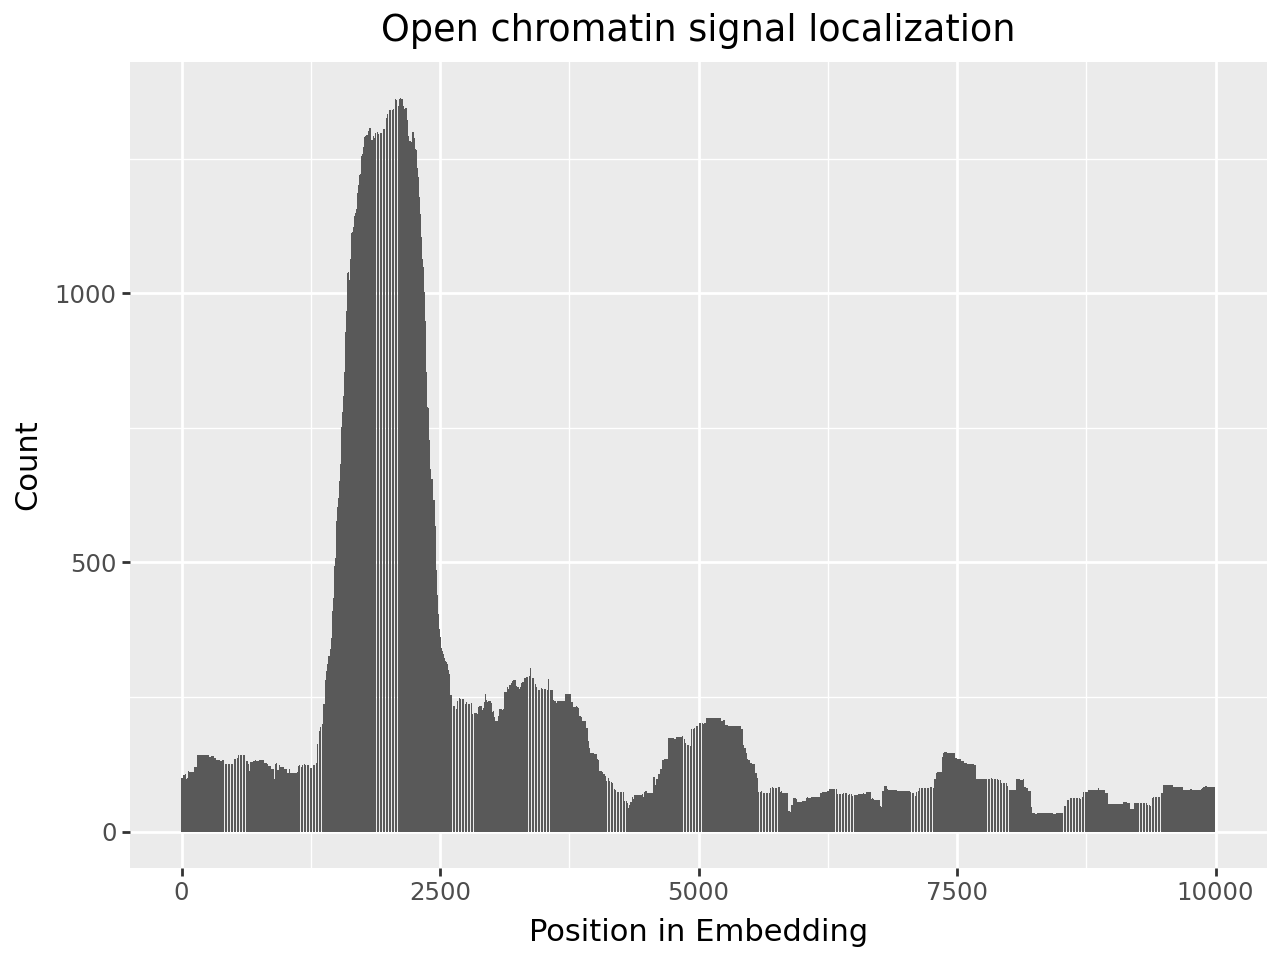

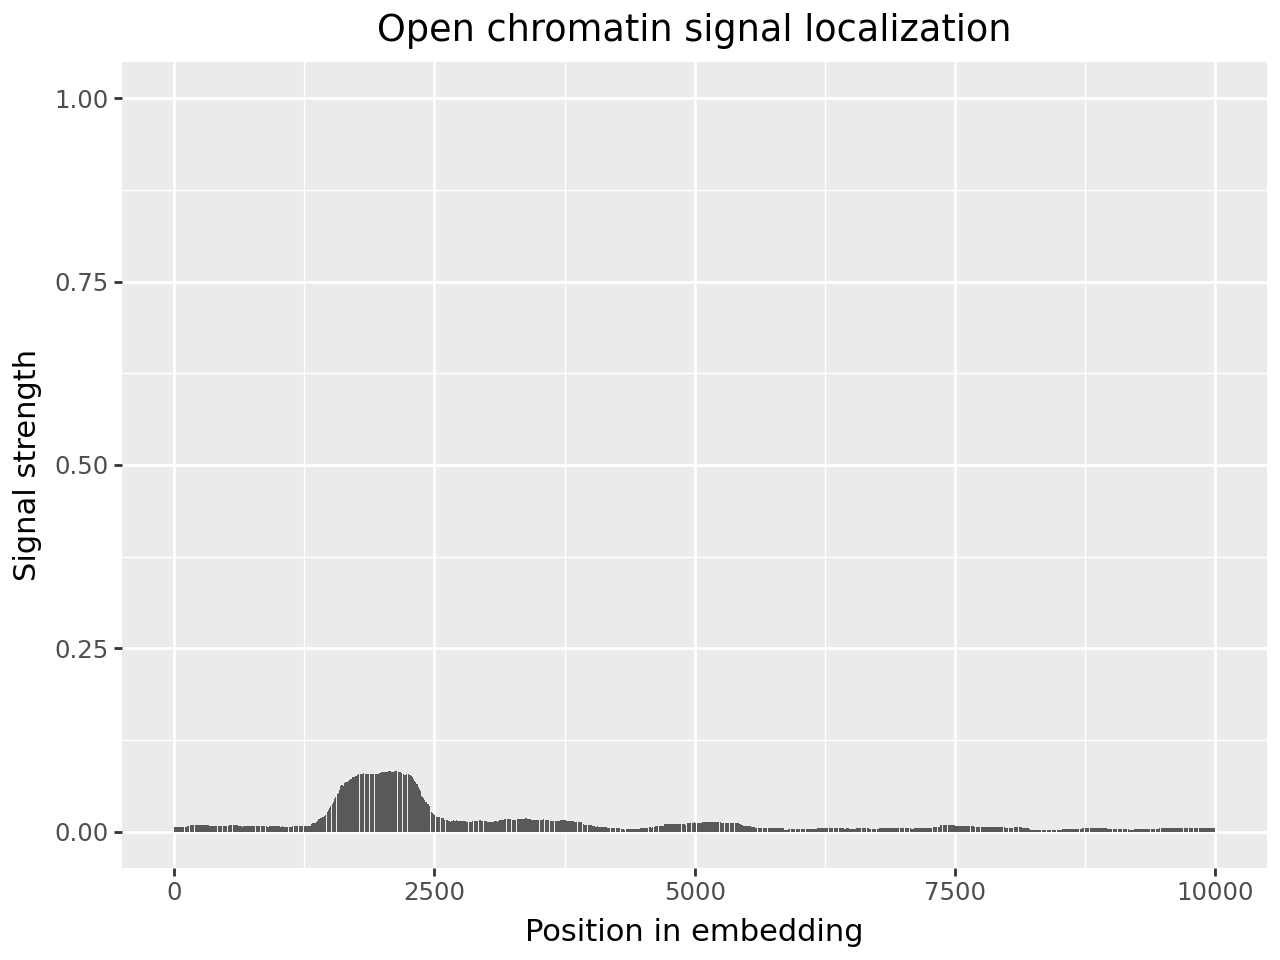

In [48]:
atac_df = plot_signal_localization(test_dataset, 0, 'Open chromatin')

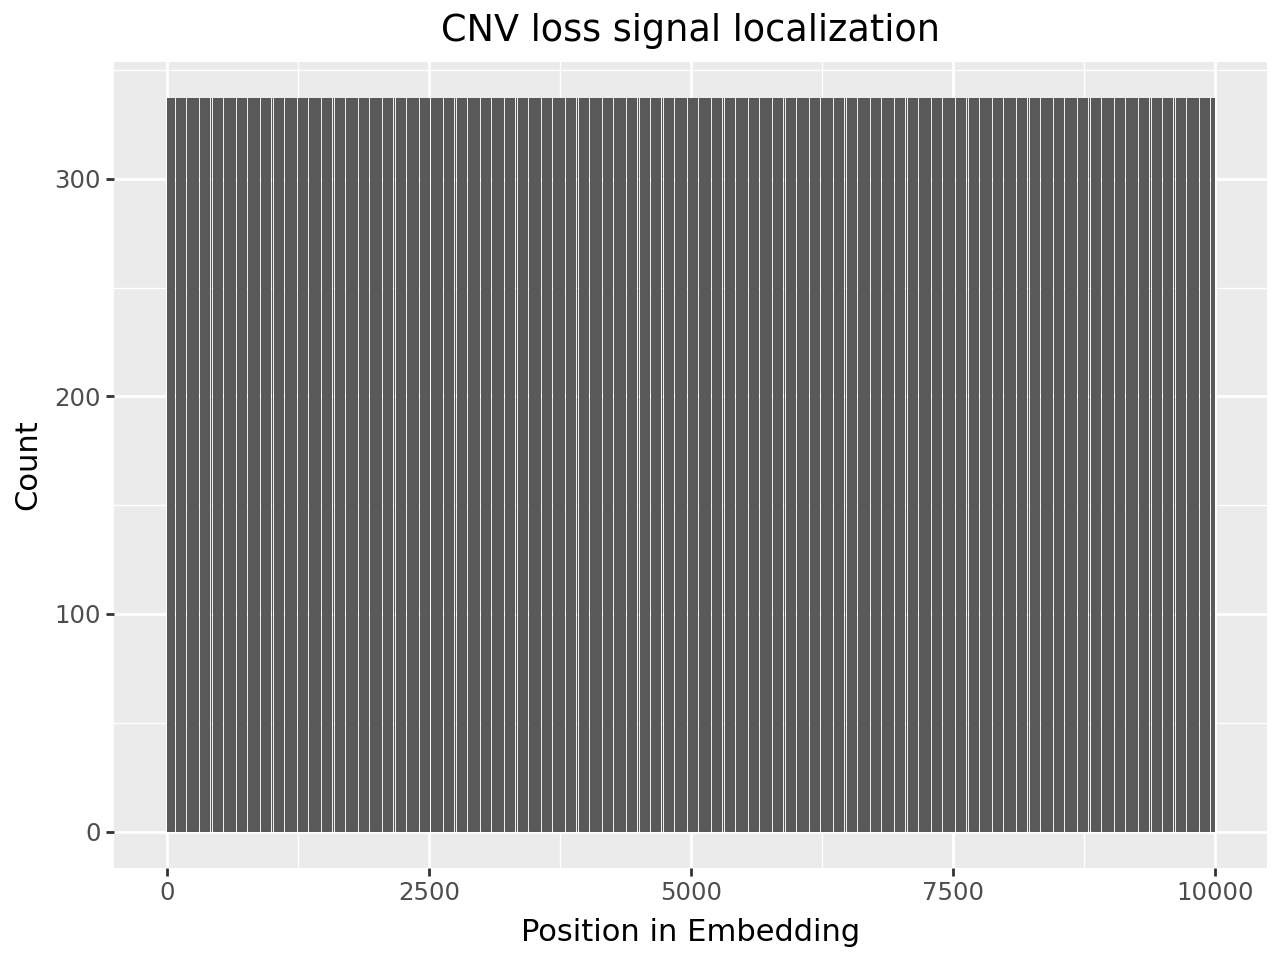

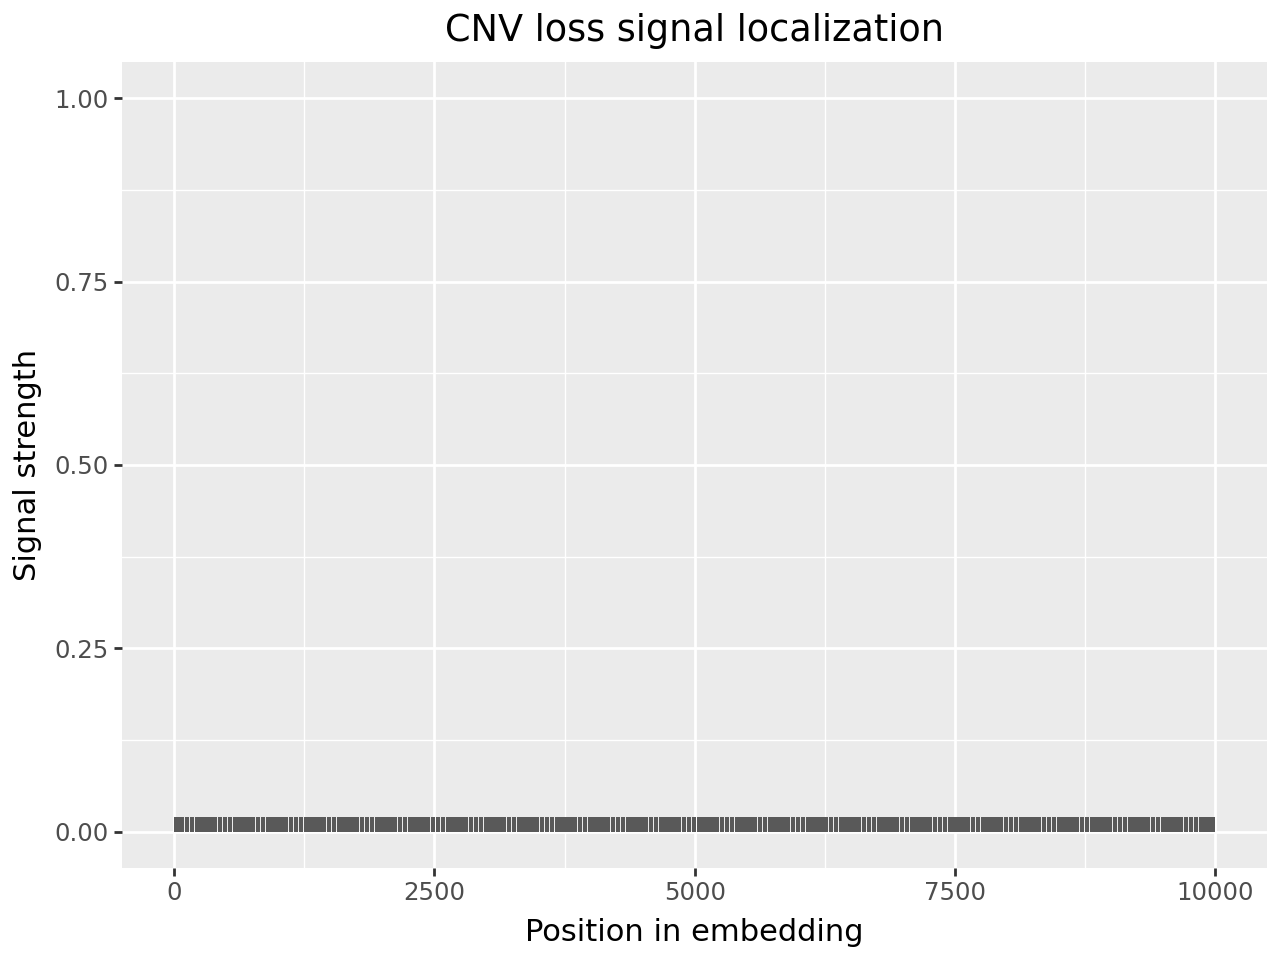

In [45]:
cnv_loss_df = plot_signal_localization(test_dataset, 1, 'CNV loss')

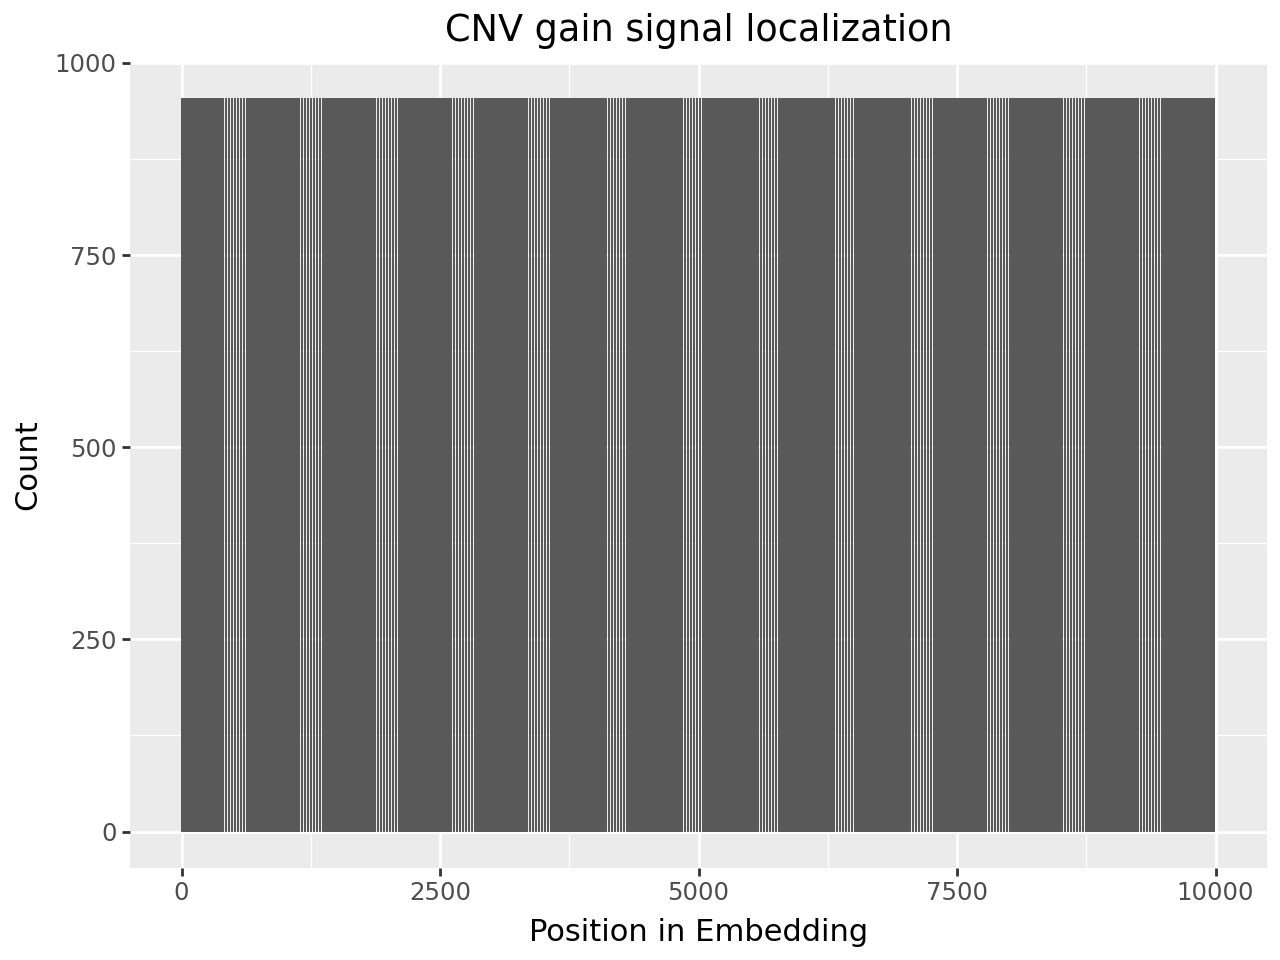

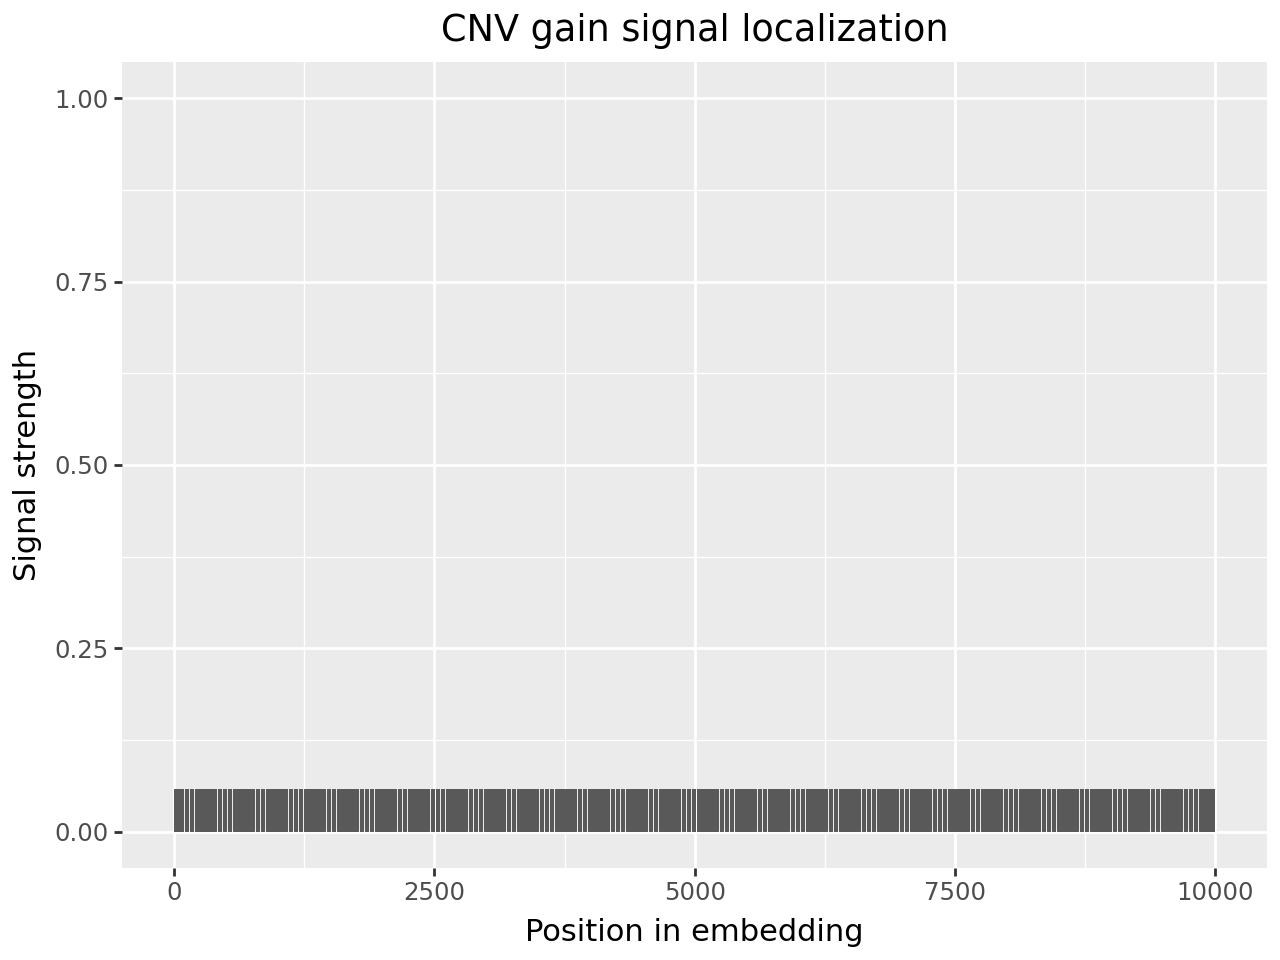

In [44]:
cnv_gain_df = plot_signal_localization(test_dataset, 2, 'CNV gain')

In [30]:
from plotnine import *

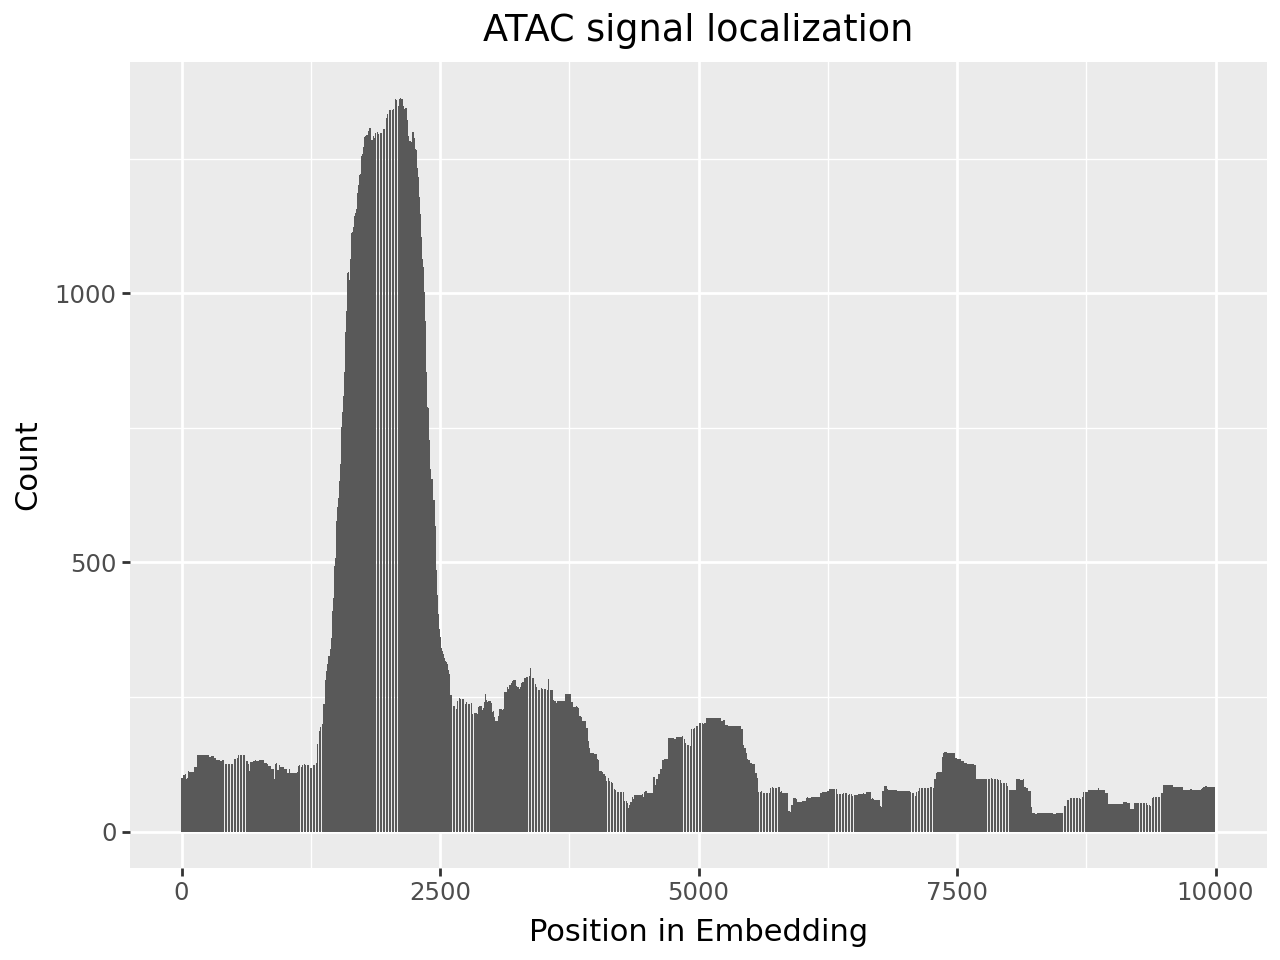

In [38]:
ggplot(atac_signal_df, aes(x='pos', y='count')) + geom_col() + labs(title='ATAC signal localization', x='Position in Embedding', y='Count')

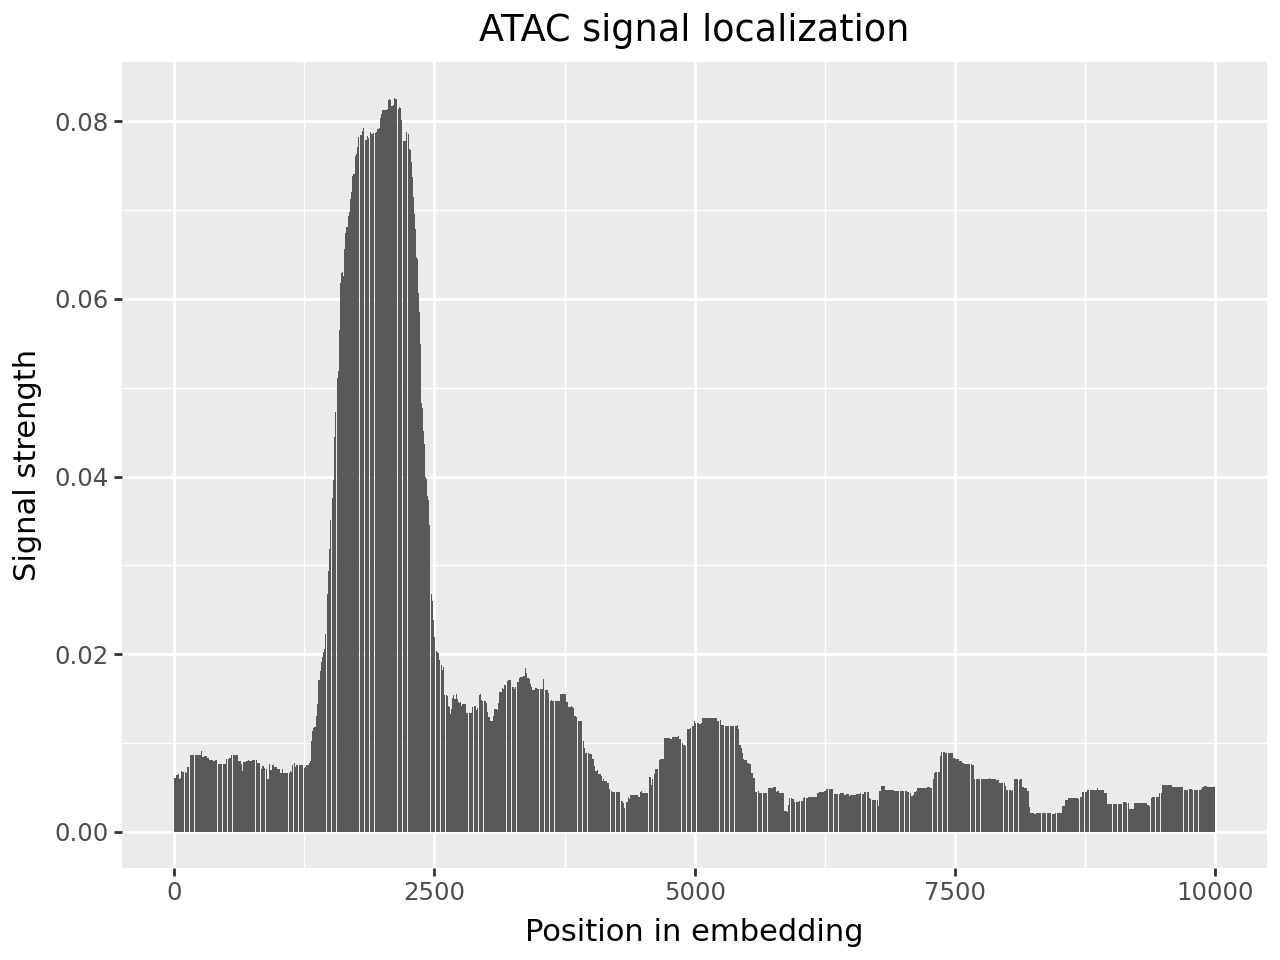

In [37]:
ggplot(atac_signal_df, aes(x='pos', y='percent')) + geom_col() + labs(title='ATAC signal localization', x='Position in embedding', y='Signal strength')

In [47]:
test_CNN_model('model/SimpleCNN_batch1/SimpleCNN_batch1_noDNA_run0.pth', SimpleCNN, hparams, test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

Testing:   0%|                                                                                                                | 0/515 [00:00<?, ?it/s]

Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 515/515 [01:53<00:00,  4.55it/s]

Test MSE: 0.7849
Accuracy: 0.3688
Precision: 0.3688
Recall: 1.0000
F1 Score: 0.5388
AUC: 0.4958


0.7848834194025947

In [ ]:
test_model('model/ChrCNN_batch1/ChrCNN_batch1_noDNA_run3.pth', test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

In [49]:
test_CNN_model('model/PromoterCNN_batch1/PromoterCNN_batch1_noDNA_run0.pth', PromoterCNN, hparams, test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 515/515 [00:40<00:00, 12.66it/s]

Test MSE: 0.6940
Accuracy: 0.3688
Precision: 0.3688
Recall: 1.0000
F1 Score: 0.5388
AUC: 0.5000


0.6939757385300201

In [ ]:
# test_model('model/ModChrCNN_batch1/ModChrCNN_batch1_noDNA_run0.pth', test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

## Test Batch 2

In [ ]:
batch_name = 'batch_' + BATCH
test_data_root = data_root / 'embeddings' / batch_name / 'test'
assert test_data_root.is_dir(), \
    'Test data not found: {} not a directory'.format(test_data_root)
test_df = pd.read_csv(
    data_root / 'splits' / 'batch{}_test_filtered.tsv'.format(BATCH),
    sep='\t'
    ) #.head(700)
test_dataset = CnvMemoryDataset(
    root=test_data_root, data_df=test_df, include_dna=INCLUDE_DNA,
    include_atac=INCLUDE_ATAC, include_cnv=INCLUDE_CNV
    )
print('Batch {} test loaded: {} data points'.format(BATCH, len(test_dataset)))

Using 69 barcodes
Using 726 genes
No embedding files for 884 data points in data/embeddings/batch_2/test/single_gene_barcode!
Batch 2 test loaded: 6444 data points


NameError: name 'hparams' is not defined

In [31]:
test_loader = DataLoader(test_dataset, batch_size=hparams.get('batch_size', 32), shuffle=False, drop_last=True)

In [19]:
test_model('model/ChrCNN_batch2/ChrCNN_batch2_noDNA_run0.pth', test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [03:27<00:00,  1.03s/it]


Test MSE: 0.6966
Accuracy: 0.4727
Precision: 0.4727
Recall: 1.0000
F1 Score: 0.6419
AUC: 0.5000


0.6965988384615077

In [32]:
test_CNN_model('model/SimpleCNN_batch2/SimpleCNN_batch2_noDNA_run0.pth', SimpleCNN, hparams, test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

Testing:   0%|                                                                                                                | 0/201 [00:00<?, ?it/s]

Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:50<00:00,  3.98it/s]


Test MSE: 0.7353
Accuracy: 0.4736
Precision: 0.4736
Recall: 1.0000
F1 Score: 0.6428
AUC: 0.4937


0.7353354223925083

In [36]:
test_CNN_model('model/PromoterCNN_batch2/PromoterCNN_batch2_noDNA_run0.pth', PromoterCNN, hparams, test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)

Testing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:12<00:00, 15.80it/s]

Test MSE: 0.6919
Accuracy: 0.4736
Precision: 0.4736
Recall: 1.0000
F1 Score: 0.6428
AUC: 0.5000


0.6918922965206317

In [ ]:
test_model('model/ModChrCNN_small_batch2/ModChrCNN_batch1_noDNA_run0.pth', test_loader, total_variables=IN_DIM, seq_len=SEQ_LEN, device=device)